
# Faces dataset decompositions


This example applies to `olivetti_faces_dataset` different unsupervised
matrix decomposition (dimension reduction) methods from the module
:py:mod:`sklearn.decomposition` (see the documentation chapter
`decompositions`) .


In [1]:
print(__doc__)

# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause

import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
from IPython.display import Markdown

%matplotlib inline

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(42)

# #############################################################################
# Load faces data
faces = fetch_olivetti_faces(shuffle=True, random_state=rng)
display(Markdown(faces.DESCR))


Automatically created module for IPython interactive environment


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes                                40
    Samples total                         400
    Dimensionality                       4096
    Features            real, between 0 and 1
    =================   =====================

The image is quantized to 256 grey levels and stored as unsigned 8-bit 
integers; the loader will convert these to floating point values on the 
interval [0, 1], which are easier to work with for many algorithms.

The "target" for this database is an integer from 0 to 39 indicating the
identity of the person pictured; however, with only 10 examples per class, this
relatively small dataset is more interesting from an unsupervised or
semi-supervised perspective.

The original dataset consisted of 92 x 112, while the version available here
consists of 64x64 images.

When using these images, please give credit to AT&T Laboratories Cambridge.


In [2]:
faces.data.shape

(400, 4096)

In [3]:
n_samples, n_features = faces.data.shape

# global centering
faces_centered = faces.data - faces.data.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

In [4]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [5]:
n_samples, n_features = faces.data.shape

# global centering
faces_centered = faces.data - faces.data.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

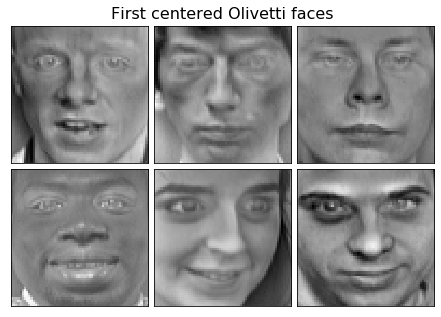

In [6]:
# #############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

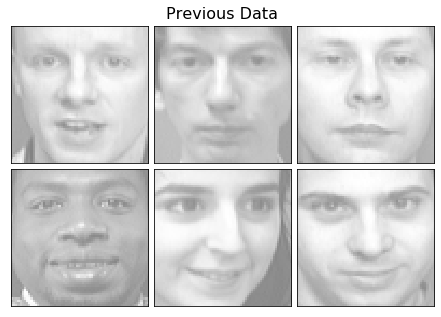

In [7]:
# #############################################################################
# Original Data
plot_gallery("Previous Data", faces.data[:n_components])

# Ejercicion 8.4 - Selección de variables y reducción de la dimensionalidad.
## Sección 1 - Comprimir las imágenes aplicando PCA de manera que se preserve el 95 % de la varianza y mostrar las 8 primeras imágenes originales y descomprimidas.

In [8]:
# Custom plot_gallery
def custom_plot_gallery(title, images, n_col=n_col, n_row=n_row, image_shape=image_shape, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap, interpolation='nearest', vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [9]:
import math
import numpy as np
from sklearn.decomposition import PCA

# Inicializamos instancia de PCA que preserve el 95% de la varianza. 
# Según la documentación, svd_solver debe ser = a 'full'.
# Usamos random_state = 42 para poder reproducir el ejercicio.
pca = PCA(n_components=0.95, svd_solver='full', random_state=42)

In [10]:
# Transformamos las imágenes usando PCA.
pca_faces = pca.fit_transform(faces_centered)
# Number of principal components:
num_pc = pca.explained_variance_ratio_.shape[0]
print(num_pc)

144


In [11]:
pca_faces.shape

(400, 144)

In [12]:
# Manteniendo una Varianza del 95% podemos descartar todos los pixeles hasta quedarnos con num_pc.
# En mi ejecución hemos reducido hasta 144 pixeles.
pca.explained_variance_

array([11.294173  ,  6.3309097 ,  4.419555  ,  3.4816918 ,  2.5313225 ,
        2.079176  ,  1.6259074 ,  1.6089649 ,  1.33885   ,  1.2653567 ,
        1.1377738 ,  1.0120255 ,  0.9512359 ,  0.84535104,  0.79360634,
        0.7438733 ,  0.670546  ,  0.5964547 ,  0.5933418 ,  0.5625473 ,
        0.49738413,  0.47354636,  0.4565477 ,  0.4336108 ,  0.4208134 ,
        0.41001505,  0.3923638 ,  0.36584294,  0.35026076,  0.3199154 ,
        0.3101579 ,  0.29025158,  0.26834637,  0.25820154,  0.25018293,
        0.24871318,  0.2368508 ,  0.22326234,  0.21844159,  0.20625785,
        0.20282415,  0.19766527,  0.19337516,  0.18663311,  0.1825785 ,
        0.17741571,  0.17586187,  0.16917121,  0.16227202,  0.15735875,
        0.15265907,  0.15091017,  0.14387542,  0.14127125,  0.13781463,
        0.1357481 ,  0.1312207 ,  0.1282009 ,  0.12541056,  0.12488187,
        0.12102964,  0.11994273,  0.11687139,  0.11415685,  0.1114618 ,
        0.10863664,  0.10741886,  0.10566723,  0.10247897,  0.10

Image shape:
(12, 12)


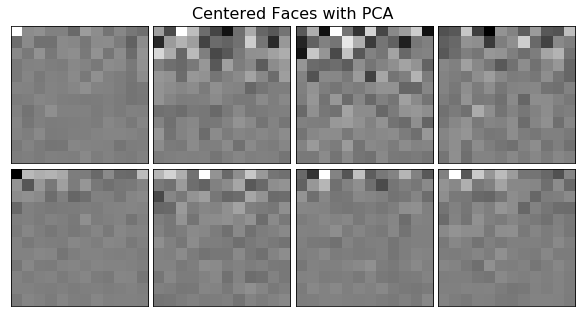

In [13]:
# #############################################################################
# PCA Data - No esperamos poder visualizar correctamente las imágenes.
custom_n_col = 4
custom_n_row = 2
num_imagenes = custom_n_col * custom_n_row # 8
dim = int(math.sqrt(num_pc))
pca_image_shape = (dim, dim)
print('Image shape:')
print(pca_image_shape)
 
custom_plot_gallery("Centered Faces with PCA", pca_faces[:num_imagenes], n_col=custom_n_col, n_row=custom_n_row, image_shape=pca_image_shape)

Image shape:
(64, 64)


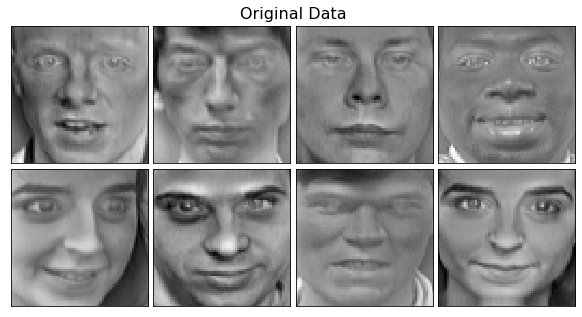

In [14]:
# #############################################################################
# Original Data
original_n_col = 4
original_n_row = 2
orig_num_imagenes = custom_n_col * custom_n_row # 8
dim = 64
original_shape = (dim, dim)
print('Image shape:')
print(original_shape)

custom_plot_gallery("Original Data", faces_centered[:orig_num_imagenes], n_col=original_n_col, n_row=original_n_row, image_shape=original_shape)

## Reconstruimos las imágenes usando inverse_transform.

In [15]:
imagenes_reconstruidas = pca.inverse_transform(pca_faces)

Image shape:
(64, 64)


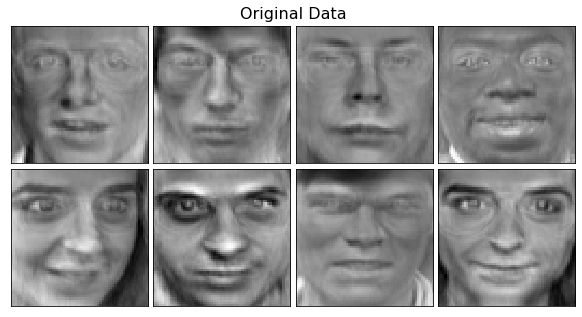

In [16]:
# #############################################################################
# PCA Data Reconstruida
reco_n_col = 4
reco_n_row = 2
reco_num_imagenes = custom_n_col * custom_n_row # 8
dim = 64
reco_shape = (dim, dim)
print('Image shape:')
print(reco_shape)

custom_plot_gallery("Original Data", imagenes_reconstruidas[:reco_num_imagenes], n_col=reco_n_col, n_row=reco_n_row, image_shape=reco_shape)

### Resultado:

In [17]:
# Dataset con Imágenes Comprimidas:
pca_faces

array([[ 5.29803562e+00,  4.99049157e-01,  6.75749600e-01, ...,
        -1.23855375e-01, -1.80576712e-01,  4.28831913e-02],
       [ 5.13695240e-01, -8.49385321e-01,  2.08276224e+00, ...,
         1.81890111e-02,  1.33321444e-02, -1.66297451e-01],
       [-4.13830698e-01,  4.98635739e-01, -1.22585261e+00, ...,
        -8.10003430e-02, -4.55518663e-02, -1.13947779e-01],
       ...,
       [-8.56588662e-01,  4.61894035e-01, -3.78863406e+00, ...,
        -1.12489634e-03,  1.59495026e-01,  7.30429813e-02],
       [ 7.28441048e+00,  9.68237996e-01,  1.28250748e-01, ...,
        -2.60818213e-01,  3.88140487e-03,  2.91201994e-02],
       [-2.88481879e+00, -2.27651954e+00, -4.02417707e+00, ...,
         2.18576845e-02, -1.99160382e-01,  2.79929161e-01]], dtype=float32)

In [18]:
# Nº de pixeles que quedan al comprimir (144 en mi ejecución)
num_pc

144

## Sección 2 - Lo mismo que en 1. usando LDA.

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

target = faces.target

# instanciamos LDA sin numero de components para averiguar cuantos N_componenets hacen falta para llegar al 95% de varianza.
lda = LDA(n_components=None)
lda_faces = lda.fit_transform(faces_centered, target)

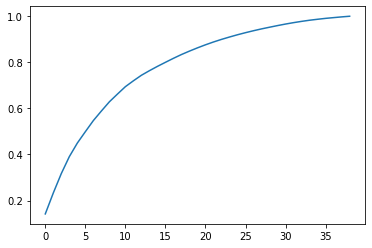

In [20]:
import matplotlib.pyplot as plt

# Entre 25 y 35 componenets son necesarios para conseguir el 95% de varianza.
plt.plot(np.cumsum(lda.explained_variance_ratio_))

In [21]:
# Función para calcular el número de componentes necesarios para llegar a varianza del 95%.
def n_components_for_variance_ration(variance, lda):
    num_comp = 0
    var_cumulativa = np.cumsum(lda.explained_variance_ratio_)
    for var in var_cumulativa:
        num_comp = num_comp + 1
        if var > 0.95:
            break
            
    return num_comp

In [22]:
lda_num_comp = n_components_for_variance_ration(0.95, lda)
lda_num_comp # = 29;

29

In [23]:
# LDA final con 29 componentes:
lda = LDA(n_components=lda_num_comp)
lda_faces = lda.fit_transform(faces_centered, target)

### Mostramos las imágenes las reconstruidas desde LDA y las originales:

In [24]:
def lda_inverse_transform(lda, data):
    print(data.shape)
    
    inv = np.linalg.pinv(lda.scalings_)
    inv_data = np.dot(data, inv) + lda.xbar_

    return inv_data

In [25]:
lda.scalings_.shape

(4096, 39)

In [26]:
# NOTA: He intentado calcular la matriz inversa del LDA, pero no ha sido posiblem. 
# Por lo que he leído, al descartar tantas dimensiones, NO es posible reconstuir la imagen. Esto es lo mas cerca que he llegado:
# lda_reconstruido = lda_inverse_transform(lda, faces_centered)

In [27]:
# #############################################################################
# LDA Data Reconstruida


"""
reco_n_col = 4
reco_n_row = 2
reco_num_imagenes = custom_n_col * custom_n_row # 8
dim = 64
reco_shape = (dim, dim)
print('Image shape:')
print(reco_shape)

custom_plot_gallery("Original Data", lda_reconstruido[:reco_num_imagenes], n_col=reco_n_col, n_row=reco_n_row, image_shape=reco_shape"
"""

'\nreco_n_col = 4\nreco_n_row = 2\nreco_num_imagenes = custom_n_col * custom_n_row # 8\ndim = 64\nreco_shape = (dim, dim)\nprint(\'Image shape:\')\nprint(reco_shape)\n\ncustom_plot_gallery("Original Data", lda_reconstruido[:reco_num_imagenes], n_col=reco_n_col, n_row=reco_n_row, image_shape=reco_shape"\n'

Image shape:
(64, 64)


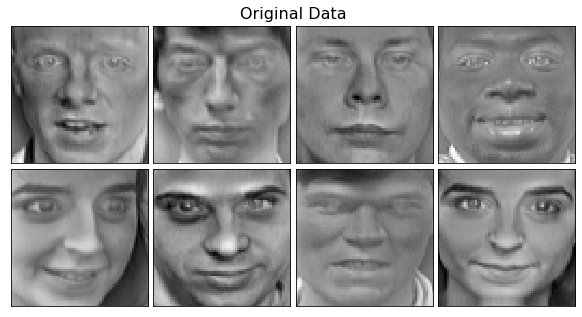

In [28]:
# #############################################################################
# Original Data
orig_n_col = 4
orig_n_row = 2
orig_num_imagenes = custom_n_col * custom_n_row # 8
dim = 64
orig_shape = (dim, dim)
print('Image shape:')
print(orig_shape)

custom_plot_gallery("Original Data", faces_centered[:reco_num_imagenes], n_col=orig_n_col, n_row=orig_n_row, image_shape=orig_shape)

### Resultados:

In [29]:
# Dataset con Imágenes Comprimidas usando LDA:
lda_faces

array([[ -6.25718656,   2.02964172,   2.58946661, ...,   4.39318425,
         -0.88240329,  -1.28355861],
       [  0.59698676,  -9.24963348,   3.65898068, ...,   1.03667301,
         -0.75969792,  -0.80224567],
       [ -2.79217593,   3.07740831,   2.88153598, ...,   2.17922199,
          1.03596609,   0.98912381],
       ...,
       [ 19.46452723,  -9.77159332,  -9.56636676, ...,  -1.18340765,
          0.45186132,  -0.14480294],
       [ -7.62593681,   0.25732627,  -5.19540311, ...,  -0.28473286,
          1.60664671,   1.67571282],
       [ 13.51060533, -10.44381882,  -9.0716531 , ...,   3.64219982,
          1.95878425,  -0.40683646]])

In [30]:
# Nº de pixeles que quedan al comprimir (29 en mi ejecución)
lda_num_comp

29

## 3 - Dividir los datos en conjunto de entrenamiento y test de manera que el conjunto de test sea un 20 % del total, tanto para los datos originales como para los comprimidos con PCA y LDA. Repasar la documentación de scikit-learn referida a SVM para ver si es conveniente aplicar transformaciones a los datos.

In [31]:
from sklearn.model_selection import train_test_split

# Dividimos en test set y train set:
train_orig_imgs, test_orig_imgs, train_orig_lbl, test_orig_lbl = train_test_split( faces_centered, faces.target, test_size=0.2, random_state=42)
train_lda_imgs, test_lda_imgs, train_lda_lbl, test_lda_lbl = train_test_split( lda_faces, faces.target, test_size=0.2, random_state=42)
train_pca_imgs, test_pca_imgs, train_pca_lbl, test_pca_lbl = train_test_split( pca_faces, faces.target, test_size=0.2, random_state=42)

In [32]:
# 80%
train_orig_imgs.shape

(320, 4096)

In [33]:
# 20%
test_orig_imgs.shape

(80, 4096)

#### Para utilizar SVC y LinearSVC debemos Normalizar los datos usando un StandarScaler. Aplicaremos el scaler en el siguiente ejercicio.


### 4 - Realizar una afinación de hiperparámetros para LinearSVC y SVC con kernel ’rbf’ para la clasificación de los datos originales, realizando la búsqueda de parámetros como se comentó en las subsecciones 7.4.1 y 7.4.2 (cambiando SVR por SVC). Usar para el parámetro ’cv’ de GridSearchCV el valor 10. Medir los tiempos en milisegundos de las dos ejecuciones de GridSearchCV. Se recomienda usar multiproceso.

In [34]:
# Para que sea mas facil de aplicar, usaremos un Pipeline:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# svc_pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
# linear_svc_pipe = make_pipeline(StandardScaler(), LinearSVC())

linear_svc_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearSVC())
])

svc_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC())
])

### ORIGINAL DATA

Primero haremos una busqueda amplia para encontrar la zona donde tenemos mejor resultado. En segundo lugar haremos una búsqueda enfocada en la zona de mejor resultado.

In [35]:
# Coarse search
def model_grid_search(model_pipe, param_grid ,x_train, y_train):
    grid_search = GridSearchCV(model_pipe, param_grid, cv=10, n_jobs=-1, verbose=True)
    grid_res = grid_search.fit(x_train, y_train)
    return grid_res

#### SVC

In [36]:
orig_svc_param_grid = {
    'model__C' : np.logspace(-15, 15, base=2, num=5),
    'model__gamma' : np.logspace(-15, 15, base=2, num=5),
    'model__kernel' : ['rbf'],
    'model__class_weight' : ['balanced']

}

orig_svc_search = model_grid_search(svc_pipe, orig_svc_param_grid, faces_centered, faces.target)

{'model__C': 181.01933598375618,
 'model__class_weight': 'balanced',
 'model__gamma': 3.0517578125e-05,
 'model__kernel': 'rbf'}

In [45]:
orig_svc_search.best_params_

{'model__C': 181.01933598375618,
 'model__class_weight': 'balanced',
 'model__gamma': 3.0517578125e-05,
 'model__kernel': 'rbf'}

#### Valor de c:
log2(181.019) = 6.8829, por lo que tenemos que ajustar el gridsearch para afinar entre 2ˆ5 y 2ˆ8.
#### Valor de GAMMA:
log2(3.05*10^-5) = -15, por lo que tenemos que probar con gamma < -15.

In [46]:
orig_svc_param_grid2 = {
    'model__C' : np.logspace(5, 8, base=2, num=5),
    'model__gamma' : np.logspace(-20, -15, base=2, num=5),
    'model__kernel' : ['rbf'],
    'model__class_weight' : ['balanced']

}

orig_svc_search2 = model_grid_search(svc_pipe, orig_svc_param_grid2, faces_centered, faces.target)

{'model__C': 32.0,
 'model__class_weight': 'balanced',
 'model__gamma': 1.2831061023768837e-05,
 'model__kernel': 'rbf'}

In [47]:
orig_svc_search2.best_params_

{'model__C': 32.0,
 'model__class_weight': 'balanced',
 'model__gamma': 1.2831061023768837e-05,
 'model__kernel': 'rbf'}

#### Valor de c:
log2(32.0) = 5, por lo que tenemos que ajustar el gridsearch para afinar entre 2ˆ3 y 2ˆ6.
#### Valor de GAMMA:
log2(1.2831061023768837e-05) = -16.25, por lo que tenemos que probar con gamma 2ˆ-16 y 2ˆ-18.

In [48]:
orig_svc_param_grid3 = {
    'model__C' : np.logspace(3, 6, base=2, num=5),
    'model__gamma' : np.logspace(-18, -16, base=2, num=5),
    'model__kernel' : ['rbf'],
    'model__class_weight' : ['balanced']

}

orig_svc_search3 = model_grid_search(svc_pipe, orig_svc_param_grid3, faces_centered, faces.target)
orig_svc_search3.best_params_

{'model__C': 22.627416997969522,
 'model__class_weight': 'balanced',
 'model__gamma': 1.0789593218788873e-05,
 'model__kernel': 'rbf'}

{'model__C': 22.627416997969522,
 'model__class_weight': 'balanced',
 'model__gamma': 1.0789593218788873e-05,
 'model__kernel': 'rbf'}

Final Results: </br>
C = 2^4.5</br>
GAMMA = 2ˆ-16.5

#### LinearSVC

In [ ]:
orig_linear_svc_param_grid = {
    'model__C' : np.logspace(0, 15, base=2, num=5),
}

orig_linear_search = model_grid_search(linear_svc_pipe, orig_linear_svc_param_grid, faces_centered, faces.target)
orig_linear_search.best_params_

### 5 - Realizar 4. usando los datos comprimidos mediante PCA.

#### SVC

In [36]:
pca_svc_param_grid = {
    'model__C' : np.logspace(-15, 15, base=2, num=5),
    'model__gamma' : np.logspace(-15, 15, base=2, num=5),
    'model__kernel' : ['rbf'],
    'model__class_weight' : ['balanced']

}

pca_svc_search = model_grid_search(svc_pipe, pca_svc_param_grid, pca_faces, faces.target)
pca_svc_search.best_params_

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    6.6s finished


{'model__C': 181.01933598375618,
 'model__class_weight': 'balanced',
 'model__gamma': 3.0517578125e-05,
 'model__kernel': 'rbf'}

{'model__C': 181.01933598375618,
 'model__class_weight': 'balanced',
 'model__gamma': 3.0517578125e-05,
 'model__kernel': 'rbf'}
 
 Tiempo: 6.6s

Tenemos los mismos valorss que en los datos originales pero con un tiempo de ejecución mucho menor. Probamos con los valores finales:

#### Valor de c:
Ajustamos el gridsearch para afinar entre 2ˆ4 y 2ˆ5.
#### Valor de GAMMA:
Ajustamos gamma a 2ˆ-16 y 2ˆ-17.

In [42]:
pca_svc_param_grid2 = {
    'model__C' : np.logspace(4,5, base=2, num=5),
    'model__gamma' : np.logspace(-17, -16, base=2, num=5),
    'model__kernel' : ['rbf'],
    'model__class_weight' : ['balanced']

}

pca_svc_search2 = model_grid_search(svc_pipe, pca_svc_param_grid2, pca_faces, faces.target)
pca_svc_search2.best_params_

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    4.9s finished


{'model__C': 16.0,
 'model__class_weight': 'balanced',
 'model__gamma': 7.62939453125e-06,
 'model__kernel': 'rbf'}

{'model__C': 16.0,
 'model__class_weight': 'balanced',
 'model__gamma': 7.62939453125e-06,
 'model__kernel': 'rbf'}
 
 Tiempo: 7.5s

Los valores cambian mucho. Volvemos a hacer búsqueda amplia.

In [51]:
pca_svc_param_grid3 = {
    'model__C' : np.logspace(-36,-35, base=2, num=20),
    'model__gamma' : np.logspace(-30, -20, base=2, num=20),
    'model__kernel' : ['rbf'],
    'model__class_weight' : ['balanced']

}

pca_svc_search3 = model_grid_search(svc_pipe, pca_svc_param_grid3, pca_faces, faces.target)
pca_svc_search3.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  1.2min finished


{'model__C': 1.8112661047256913e-11,
 'model__class_weight': 'balanced',
 'model__gamma': 2.2164234042368094e-07,
 'model__kernel': 'rbf'}

{'model__C': 1.8112661047256913e-11,
 'model__class_weight': 'balanced',
 'model__gamma': 2.2164234042368094e-07,
 'model__kernel': 'rbf'}
 
 Timepo: 1.2 mins

Tras varias pruebas y errores llego al siguiente resultado:

Resultados : </br>
C = 2^-35.68</br>
GAMMA = 2ˆ-22.10

#### LinearSVC

In [ ]:
pca_linear_svc_param_grid = {
    'model__C' : np.logspace(0, 3, base=2, num=5),
}

pca_linear_search = model_grid_search(linear_svc_pipe, pca_linear_svc_param_grid, pca_faces, faces.target)
pca_linear_search.best_params_

Final Results: </br>
C = 2^4.5</br>
GAMMA = 2ˆ-16.5

### 6 - Realizar 5. usando los datos comprimidos mediante LDA.

#### SVC

In [36]:
lda_svc_param_grid = {
    'model__C' : np.logspace(-15, 15, base=2, num=5),
    'model__gamma' : np.logspace(-15, 15, base=2, num=5),
    'model__kernel' : ['rbf'],
    'model__class_weight' : ['balanced']

}

lda_svc_search = model_grid_search(svc_pipe, lda_svc_param_grid, lda_faces, faces.target)
lda_svc_search.best_params_

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 235 out of 250 | elapsed:    3.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    3.9s finished


{'model__C': 181.01933598375618,
 'model__class_weight': 'balanced',
 'model__gamma': 0.005524271728019903,
 'model__kernel': 'rbf'}

{'model__C': 181.01933598375618,
 'model__class_weight': 'balanced',
 'model__gamma': 0.005524271728019903,
 'model__kernel': 'rbf'}
 
 Tiempo: 3.9s

#### Valor de c:
log2(181.01933598375618) = 7.5, por lo que tenemos que ajustar el gridsearch para afinar entre 2ˆ3 y 2ˆ9.
#### Valor de GAMMA:
log2(0.005524271728019903) = -7.5, por lo que tenemos que probar con gamma 2ˆ-3 y 2ˆ-9.

In [37]:
lda_svc_param_grid2 = {
    'model__C' : np.logspace(3, 9, base=2, num=10),
    'model__gamma' : np.logspace(-9, -3, base=2, num=10),
    'model__kernel' : ['rbf'],
    'model__class_weight' : ['balanced']

}

lda_svc_search2 = model_grid_search(svc_pipe, lda_svc_param_grid2, lda_faces, faces.target)
lda_svc_search2.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    6.9s finished


{'model__C': 8.0,
 'model__class_weight': 'balanced',
 'model__gamma': 0.001953125,
 'model__kernel': 'rbf'}

C se nos va a 3 y GAMMA a -9... Probamos con valores menores.

In [42]:
lda_svc_param_grid3 = {
    'model__C' : np.logspace(0.5, 2.5, base=2, num=10),
    'model__gamma' : np.logspace(-9, -6, base=2, num=10),
    'model__kernel' : ['rbf'],
    'model__class_weight' : ['balanced']

}

lda_svc_search3 = model_grid_search(svc_pipe, lda_svc_param_grid3, lda_faces, faces.target)
lda_svc_search3.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.7s finished


{'model__C': 1.4142135623730951,
 'model__class_weight': 'balanced',
 'model__gamma': 0.006200785359250777,
 'model__kernel': 'rbf'}

In [44]:
lda_svc_param_grid4 = {
    'model__C' : np.logspace(-0.5, 0.5, base=2, num=10),
    'model__gamma' : np.logspace(-7.5, -6.5, base=2, num=10),
    'model__kernel' : ['rbf'],
    'model__class_weight' : ['balanced']

}

lda_svc_search4 = model_grid_search(svc_pipe, lda_svc_param_grid4, lda_faces, faces.target)
lda_svc_search4.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    7.6s finished


{'model__C': 0.7071067811865476,
 'model__class_weight': 'balanced',
 'model__gamma': 0.010229566993554482,
 'model__kernel': 'rbf'}

{'model__C': 0.7071067811865476,
 'model__class_weight': 'balanced',
 'model__gamma': 0.010229566993554482,
 'model__kernel': 'rbf'}
 
 Tiempo: 7.6s

Resultados:
C = -0.5
GAMMA = -6.6

#### LinearSVC

In [ ]:
lda_linear_svc_param_grid = {
    'model__C' : np.logspace(0, 3, base=2, num=5),
}

lda_linear_search = model_grid_search(linear_svc_pipe, lda_linear_svc_param_grid, lda_faces, faces.target)
lda_linear_search.best_params_

### CONCLUSIONES

- LDA reduce la dimensionalidad mas agresivamente que PCA.
- PCA y LDA tienen unos tiempos de entrenamiento muy inferiores a no utilizar la reducción de dimensionalidad.
- La diferencia en tiempo de entrenamiento entre PCA y LDA no es significativa.
- Si usamos PCA podemos reconstruir la imagen.
- Si usamos LDA no podemos recosntruir la imagen,